#  Parkinson's Freezing of Gait Prediction
A motivação desse trabalho surgiu da competição Parkinson's Freezing of Gait Prediction no kaggle.

O objetivo é identificar o momento do congelamento de marcha em pessoas com mal de Parkinson.

link: https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction/overview

## Carregando dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [ ]:
# !pip install tsfresh

In [ ]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [ ]:
dfs = []
arquivos = [
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/02ea782681.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/06414383cf.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/092b4c1819.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/0c55be4384.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/0d7ab3a9f9.csv",
            "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/0eaac04f17.csv"
            ]
for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    dfs.append(df)
df_concatenado = pd.concat(dfs)

In [ ]:
df_concatenado['StartHesitation'].value_counts()

0    197621
Name: StartHesitation, dtype: int64

In [ ]:
df_concatenado['Turn'].value_counts()

0    196814
1       807
Name: Turn, dtype: int64

In [ ]:
df_concatenado['Walking'].value_counts()

0    197621
Name: Walking, dtype: int64

In [ ]:
df_concatenado.shape

(197621, 9)

In [ ]:
df_concatenado.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task'],
      dtype='object')

In [ ]:
df_concatenado.shape

(197621, 9)

## Pré-processamento dos dados

Considerar somente as amostras onde Valid e Task são iguais a true. Explicação da documentação dos dados:
Valid: Houve casos durante a anotação de vídeo que foram difíceis para o anotador decidir se havia um FoG acinético (ou seja, essencialmente nenhum movimento) ou se o assunto parou voluntariamente. Somente as anotações de eventos em que a série é marcada truedevem ser consideradas inequívocas.
Task: As séries foram anotadas apenas onde esse valor é true. As partes marcadas falsedevem ser consideradas não anotadas.

In [ ]:
df = df_concatenado.loc[(df_concatenado['Valid'] == True) & (df_concatenado['Task'] == True)]
valid_counts = df['Valid'].value_counts()
task_counts = df['Task'].value_counts()

print(valid_counts)
print(task_counts)

True    47292
Name: Valid, dtype: int64
True    47292
Name: Task, dtype: int64


In [ ]:
df = df.drop(columns=['Time','Valid','Task'])

In [ ]:
df.describe()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,47292.000000,47292.000000,47292.000000,47292.0,47292.000000,47292.0
mean,-1.014989,0.011790,-0.223259,0.0,0.017064,0.0
std,0.095306,0.090819,0.097968,0.0,0.129512,0.0
min,-2.021076,-0.482992,-1.053190,0.0,0.000000,0.0
25%,-1.032906,-0.046875,-0.265597,0.0,0.000000,0.0
50%,-1.000953,0.013444,-0.234375,0.0,0.000000,0.0
75%,-0.968845,0.067139,-0.188630,0.0,0.000000,0.0
max,-0.468750,0.617589,0.359375,0.0,1.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47292 entries, 1000 to 196620
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccV             47292 non-null  float64
 1   AccML            47292 non-null  float64
 2   AccAP            47292 non-null  float64
 3   StartHesitation  47292 non-null  int64  
 4   Turn             47292 non-null  int64  
 5   Walking          47292 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 2.5 MB


### Analisando a distribuição dos dados ao longo do tempo

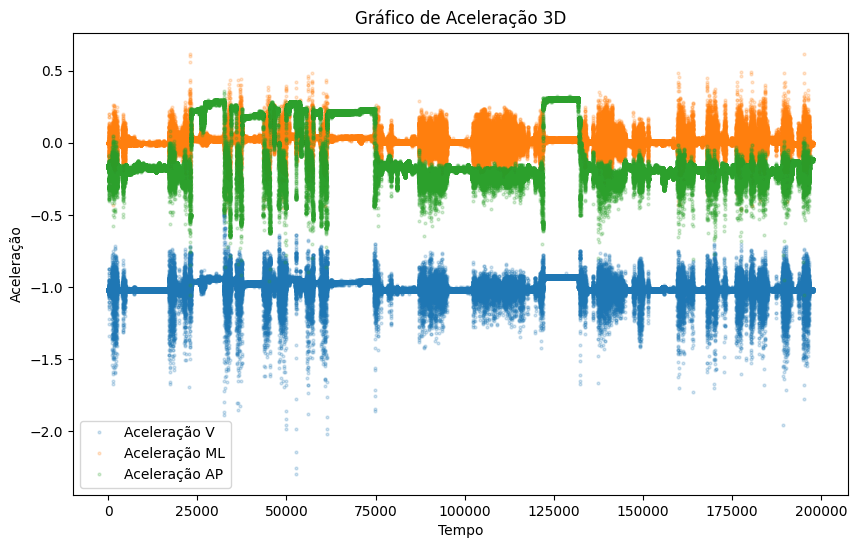

In [ ]:
# Extrair as colunas de interesse do DataFrame
aceleracao_V = df_concatenado['AccV']
aceleracao_ML = df_concatenado['AccML']
aceleracao_AP = df_concatenado['AccAP']
qtd_samples = len(aceleracao_V)

# Plotar o gráfico
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Plota a aceleração em x
plt.plot(range(0,qtd_samples), aceleracao_V, marker='.', alpha=0.2, markersize=4, linestyle='', label='Aceleração V')
# Plota a aceleração em y
plt.plot(range(0,qtd_samples), aceleracao_ML, marker='.', alpha=0.2, markersize=4, linestyle='', label='Aceleração ML')
# Plota a aceleração em z
plt.plot(range(0,qtd_samples), aceleracao_AP, marker='.', alpha=0.2, markersize=4, linestyle='', label='Aceleração AP')

plt.xlabel('Tempo')  # Rótulo do eixo x
plt.ylabel('Aceleração')  # Rótulo do eixo y
plt.title('Gráfico de Aceleração 3D')  # Título do gráfico
plt.legend()  # Mostra a legenda com as labels das linhas

# Exibe o gráfico
plt.show()

## Analisando os dados para cada atividade

### StartHesitation

In [ ]:
import matplotlib.pyplot as plt

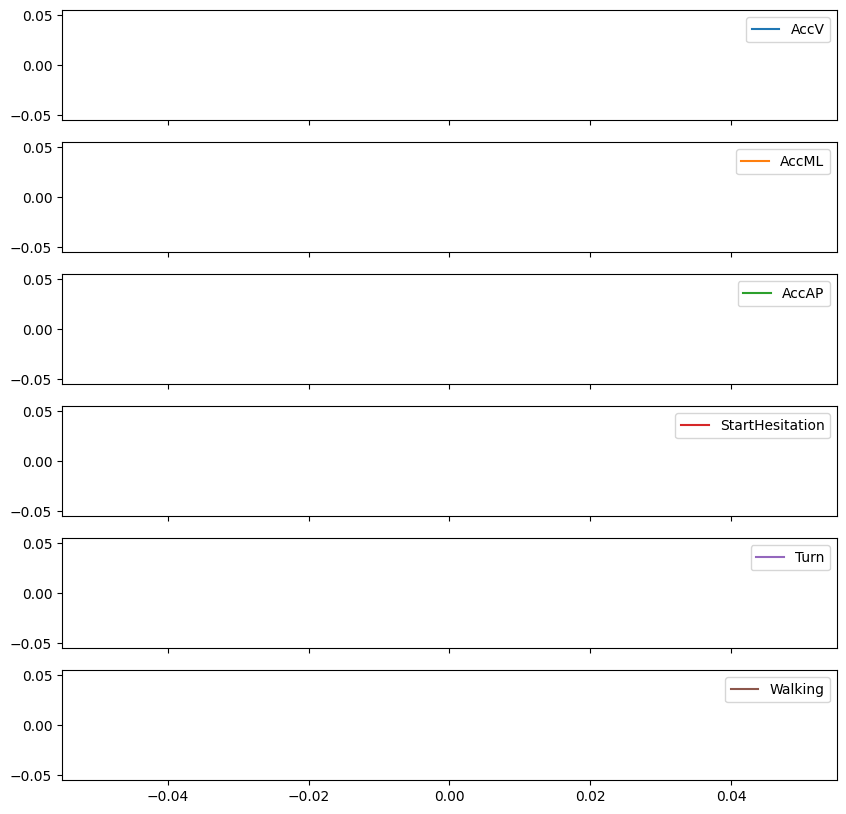

In [ ]:
df[df['StartHesitation'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

### Turn

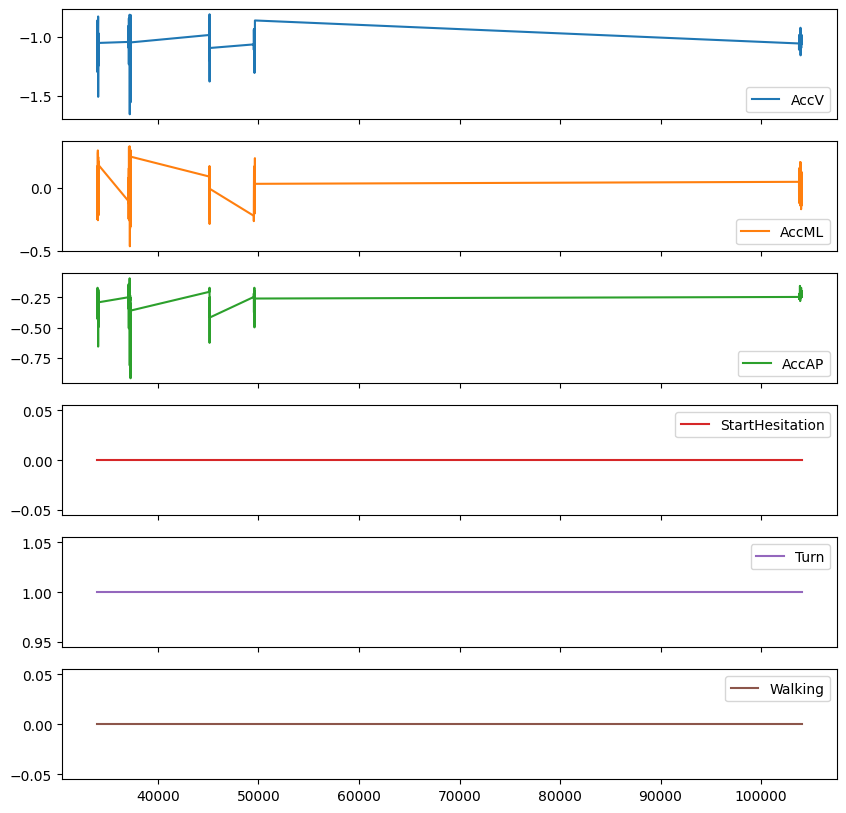

In [ ]:
df[df['Turn'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

### Walking

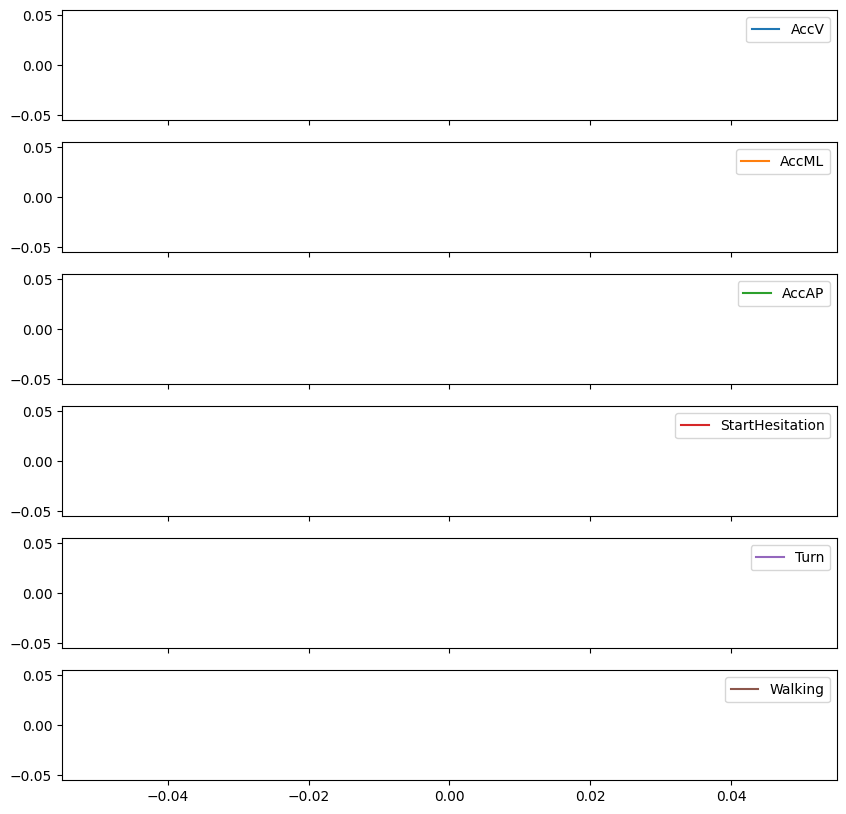

In [ ]:
df[df['Walking'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

## Correlação dos dados

In [ ]:
start_value_counts = df['StartHesitation'].value_counts()
walk_value_counts = df['Walking'].value_counts()
turn_value_counts = df['Turn'].value_counts()

print("Valores para FOG no inicio da caminhada")
print(start_value_counts)
print("Valores para FOG durante a caminhada")
print(walk_value_counts)
print("Valores para FOG ao mudar de direção")
print(turn_value_counts)

Valores para FOG no inicio da caminhada
0    47292
Name: StartHesitation, dtype: int64
Valores para FOG durante a caminhada
0    47292
Name: Walking, dtype: int64
Valores para FOG ao mudar de direção
0    46485
1      807
Name: Turn, dtype: int64


In [ ]:
df.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
1000,-1.031250,0.0,-0.15625,0,0,0
1001,-1.031250,0.0,-0.15625,0,0,0
1002,-1.030093,0.0,-0.15625,0,0,0
1003,-1.015625,0.0,-0.15625,0,0,0
1004,-1.015625,0.0,-0.15625,0,0,0


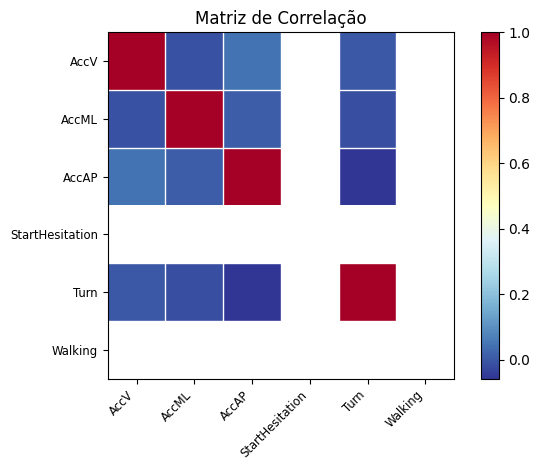

In [ ]:
correlacao = df.corr()
#plotar correlação
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

## Separando features e labels

In [ ]:
df.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
1000,-1.031250,0.0,-0.15625,0,0,0
1001,-1.031250,0.0,-0.15625,0,0,0
1002,-1.030093,0.0,-0.15625,0,0,0
1003,-1.015625,0.0,-0.15625,0,0,0
1004,-1.015625,0.0,-0.15625,0,0,0


In [ ]:
X = df[['AccV','AccML','AccAP']]
y_ = df[['StartHesitation','Turn','Walking']]

In [ ]:
y_.iloc[0]

StartHesitation    0
Turn               0
Walking            0
Name: 1000, dtype: int64

In [ ]:
y = []
for row in y_.values:
  if sum(row)==0:
    y.append(0)
  elif row[0]==1:
    y.append(1)
  elif row[1]==1:
    y.append(2)
  elif row[2]==1:
    y.append(3)

y = pd.DataFrame(y,columns=['label'])

## Separando em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37833, 3), (9459, 3), (37833, 1), (9459, 1))

In [ ]:
y.value_counts(normalize=True)

label
0        0.982936
2        0.017064
dtype: float64

## Balanceando os dados usando a técnica SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts(normalize=True)

label
0        0.5
2        0.5
dtype: float64

In [ ]:
y_resampled = y_resampled.to_numpy()

In [ ]:
y_resampled = y_resampled.ravel()

In [ ]:
y_resampled

array([0, 0, 0, ..., 2, 2, 2])

## Criando modelos de classificação

Utilizarei os modelos que utilizam diferentes abordagens para encontrar qual se adequa mais ao meu problema

- Random Forest (baseado em árvore)
- Support Vector Machines (SVM) (baseados em vetores de suporte)
- Convolutional Neural Networks (CNN) (baseados em aprendizado profundo)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scores = []
for i in range(1,7):
  rfc = RandomForestClassifier(max_depth=i, random_state=42)
  rfc.fit(X_resampled, y_resampled)
  scores.append(rfc.score(X_test, y_test))

indice_max = scores.index(max(scores))


In [ ]:
rfc = RandomForestClassifier(max_depth=indice_max, random_state=42)

In [ ]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
y_score = rfc.score(X_test, y_test)
print(y_score)

0.702399830848927


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
acc_rfc = accuracy_score(y_test,y_pred)
print(acc_rfc)

0.702399830848927


In [ ]:
y_pred

array([0, 0, 0, ..., 2, 2, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      9298
           2       0.03      0.61      0.07       161

    accuracy                           0.70      9459
   macro avg       0.51      0.66      0.44      9459
weighted avg       0.97      0.70      0.81      9459



### SVM

In [ ]:
#Importando o algoritmo de SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(gamma="auto")

In [ ]:
y_train = np.ravel(y_train)

In [ ]:
svc.fit(X_resampled, y_resampled)

y_pred = svc.predict(X_test)

acc_rfc = accuracy_score(y_test,y_pred)
print(acc_rfc)

0.5829368855058674


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      9298
           2       0.03      0.66      0.05       161

    accuracy                           0.58      9459
   macro avg       0.51      0.62      0.39      9459
weighted avg       0.97      0.58      0.72      9459



### CNN

In [ ]:
X_resampled.iloc[0]

AccV    -1.065915
AccML   -0.062500
AccAP   -0.234375
Name: 0, dtype: float64

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Reshape dos dados de entrada para o formato (amostras, comprimento, canais)
X_resampled = X_resampled.values.reshape((74374, 3, 1))

In [ ]:
# Converter os rótulos para o formato one-hot encoding
y_resampled = to_categorical(y_resampled, num_classes=4)

In [ ]:
X_test.shape

(9459, 3)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical


# Criar o modelo da CNN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(4,  activation="softmax"))

model.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
            )

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_resampled, y_resampled, epochs=10, batch_size=32)


Epoch 1/10
2325/2325 [==============================] - 10s 3ms/step - loss: 0.6807 - accuracy: 0.5776
Epoch 2/10
2325/2325 [==============================] - 6s 3ms/step - loss: 0.6402 - accuracy: 0.5892
Epoch 3/10
2325/2325 [==============================] - 5s 2ms/step - loss: 0.6377 - accuracy: 0.5934
Epoch 4/10
2325/2325 [==============================] - 7s 3ms/step - loss: 0.6251 - accuracy: 0.6078
Epoch 5/10
2325/2325 [==============================] - 5s 2ms/step - loss: 0.6106 - accuracy: 0.6364
Epoch 6/10
2325/2325 [==============================] - 5s 2ms/step - loss: 0.6055 - accuracy: 0.6475
Epoch 7/10
2325/2325 [==============================] - 6s 3ms/step - loss: 0.6014 - accuracy: 0.6511
Epoch 8/10
2325/2325 [==============================] - 12s 5ms/step - loss: 0.5981 - accuracy: 0.6541
Epoch 9/10
2325/2325 [==============================] - 8s 4ms/step - loss: 0.5958 - accuracy: 0.6557
Epoch 10/10
2325/2325 [==============================] - 4s 2ms/step - loss: 0.5

In [ ]:
X_test.shape

(9459, 3)

In [ ]:
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
y_test.shape

(9459, 4)

In [ ]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia: {accuracy}")


296/296 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.6324
Acurácia: 0.6324135661125183


In [ ]:
cnn_pred = model.predict(X_test)

296/296 [==============================] - 1s 3ms/step


In [ ]:
cnn_pred

array([[6.1769211e-01, 2.1156163e-08, 3.8230777e-01, 2.3462222e-08],
       [9.7796315e-01, 1.7641605e-11, 2.2036688e-02, 1.9985185e-11],
       [6.4554769e-01, 2.9221313e-08, 3.5445234e-01, 3.4689986e-08],
       ...,
       [4.6361890e-01, 1.4430008e-08, 5.3638113e-01, 1.1529781e-08],
       [3.9622569e-01, 2.6340853e-08, 6.0377431e-01, 2.8469305e-08],
       [5.1942015e-01, 6.7242794e-08, 4.8057967e-01, 5.6195621e-08]],
      dtype=float32)

In [ ]:
y_test.shape

(9459, 4)

## Resultados preliminares

RandomForest: accurácia 0.702399830848927

SVM: acurária 0.5829368855058674

CNN: acurária 0.6324135661125183